In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [44]:
image_path = rf'frame_images\guitar_2_frame_0083.jpg'

In [45]:
image = cv2.imread(image_path)

In [46]:
# Display given image
def show_image(input_image, image_name = 'image', color_map = 'gray'):
    cv2.imshow(image_name, input_image)
    cv2.waitKey(0)
    cv2.destroyWindow(image_name)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB), cmap=color_map)
    print(f"{image_name}: \n{input_image}\nimage shape: {input_image.shape}")

image: 
[[[124 133 160]
  [124 133 160]
  [124 133 160]
  ...
  [102 111 120]
  [102 111 120]
  [102 111 120]]

 [[123 132 159]
  [123 132 159]
  [123 132 159]
  ...
  [103 112 121]
  [103 112 121]
  [103 112 121]]

 [[124 133 160]
  [124 133 160]
  [123 132 159]
  ...
  [105 114 123]
  [104 113 122]
  [104 113 122]]

 ...

 [[  8  48 101]
  [ 13  53 106]
  [ 16  58 111]
  ...
  [106 113 122]
  [104 111 120]
  [104 111 120]]

 [[  6  46  98]
  [ 16  56 108]
  [ 21  63 116]
  ...
  [106 113 122]
  [105 112 121]
  [105 112 121]]

 [[  8  48 100]
  [ 16  59 110]
  [ 24  66 119]
  ...
  [106 113 122]
  [106 113 122]
  [106 113 122]]]
image shape: (1080, 1920, 3)


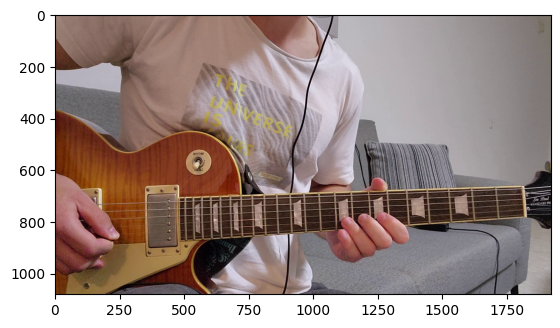

In [47]:
show_image(image)

gray_image: 
[[140 140 140 ... 113 113 113]
 [139 139 139 ... 114 114 114]
 [140 140 139 ... 116 115 115]
 ...
 [ 59  64  69 ... 115 113 113]
 [ 57  67  74 ... 115 114 114]
 [ 59  69  77 ... 115 115 115]]
image shape: (1080, 1920)


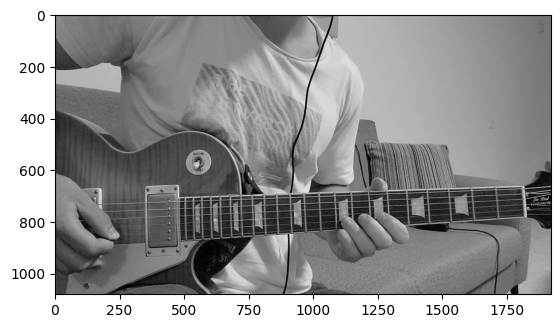

In [48]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "gray_image")


In [49]:
# Apply gaussian filter on given image, display and return the output image
def apply_gaussian_fitler(input_image, kernel_size = 5, deviation = 0):
    blurred_image = cv2.GaussianBlur(input_image, (kernel_size, kernel_size), deviation)
    show_image(blurred_image, "blurred_image")
    return blurred_image


blurred_image: 
[[139 139 139 ... 114 114 114]
 [140 139 139 ... 114 114 114]
 [140 139 139 ... 115 115 115]
 ...
 [ 63  65  67 ... 115 114 113]
 [ 64  66  69 ... 115 114 114]
 [ 65  67  70 ... 115 115 114]]
image shape: (1080, 1920)


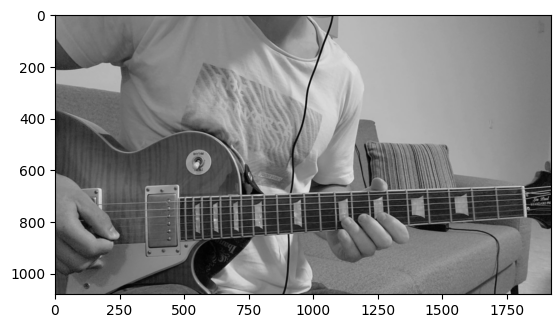

In [50]:
blurred_image = apply_gaussian_fitler(gray_image)

In [51]:
# Apply 'Canny' technique on the given image to detect it's edges
def apply_canny_edge_detection(input_image, threshold_1 = 50, threshold_2 = 150):
    canny_image = cv2.Canny(input_image, threshold_1, threshold_2)
    show_image(canny_image, "canny_image")
    return canny_image

canny_image: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
image shape: (1080, 1920)


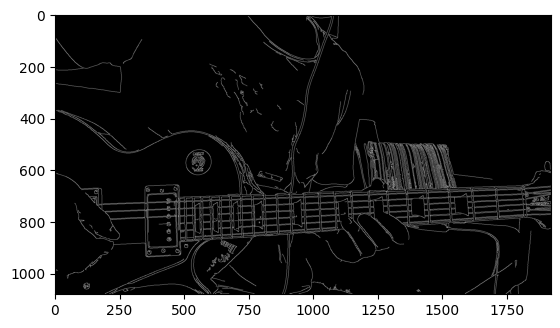

In [52]:
# Apply canny function on the blurred image to detect the edges of the image
canny_image = apply_canny_edge_detection(blurred_image)

masked image: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
image shape: (1080, 1920)


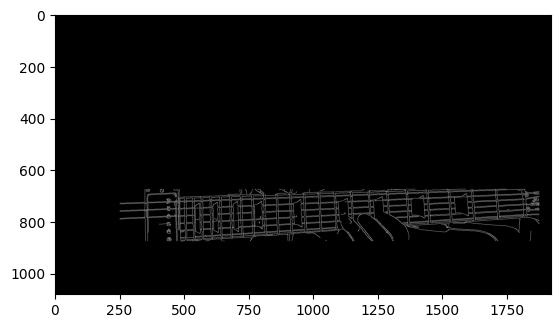

In [61]:
def create_image_mask(image):
    width = image.shape[1]
    polygons = np.array([
        [(250, 675), (width - 50, 675), (width - 50, 875), (250, 875)]
        ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    show_image(masked_image, "masked image")
    return masked_image

masked_image = create_image_mask(canny_image)